In [472]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [473]:
# Read the Error Cusum data CSV files
cu_err_df = pd.read_csv('../data/CU_ERR_clean_SSTEMP_sensor.csv')
err_target_df = pd.read_csv('../data/CU_ERR_target.csv')

#Read the Valid Cusum data CSV files
cu_val_df = pd.read_csv('../data/Valid_clean_SSTEMP_sensor.csv')
val_target_df = pd.read_csv('../data/Valid_target.csv')

#Format time colums
cu_err_df['Time'] = pd.to_datetime(cu_err_df['Time'])
err_target_df['Time'] = pd.to_datetime(err_target_df['Time'])
cu_val_df['Time'] = pd.to_datetime(cu_val_df['Time'])
val_target_df['Time'] = pd.to_datetime(val_target_df['Time'])

In [474]:
cu_val_df.head()

,State,Time,Device,Unit
0,20.9,2024-09-12 13:31:28,SSTEMP_sensor,C
1,20.9,2024-09-12 13:31:53,SSTEMP_sensor,C
2,20.9,2024-09-12 13:32:18,SSTEMP_sensor,C
3,20.9,2024-09-12 13:32:43,SSTEMP_sensor,C
4,20.9,2024-09-12 13:33:08,SSTEMP_sensor,C


In [475]:
cu_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   State   34 non-null     float64       
 1   Time    34 non-null     datetime64[ns]
 2   Device  34 non-null     object        
 3   Unit    34 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.2+ KB


In [476]:
val_target_df.head()

,Target,Time
0,21.079586,2024-09-12 13:35:13
1,21.708487,2024-09-12 13:35:38
2,22.404109,2024-09-12 13:36:03
3,23.445768,2024-09-12 13:36:28
4,25.064223,2024-09-12 13:36:53


In [477]:
val_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Target  24 non-null     float64       
 1   Time    24 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 516.0 bytes


In [478]:
cu_val_df = cu_val_df[8:33]
val_target_df.loc[20, 'Target'] = 24.1
val_target_df.loc[21, 'Target'] = 24.1
val_target_df['div_high'] = [0.5, 0.85, 1, 0.95, 0.33, 0.35, 0.4, 0.65, 0.75, 0.7, 0.6, 0.4, 0.4, 0.4, 0.4, 0.35, 0.45,
                   0.4, 0.7, 1, 0.7, 0.6, 0.6, 0.6]

val_target_df['div_low'] = [0.5, 0.85, 0.95, 0.95, 0.7, 0.35, 0.55, 0.85, 0.85, 0.8, 0.6, 0.55, 0.4, 0.4, 0.4, 0.55, 0.45,
                   0.4, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]

### Tune Values Here:

In [479]:
val_target_df['div_high'] = [0.5, 0.85, 1, 0.95, 0.33, 0.35, 0.4, 0.65, 0.75, 0.7, 0.6, 0.4, 0.4, 0.4, 0.4, 0.35, 0.45,
                   0.4, 0.7, 1, 0.7, 0.6, 0.6, 0.6]

val_target_df['div_low'] = [0.5, 0.85, 0.95, 0.95, 0.7, 0.35, 0.55, 0.85, 0.85, 0.8, 0.6, 0.55, 0.4, 0.4, 0.4, 0.55, 0.45,
                   0.4, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]

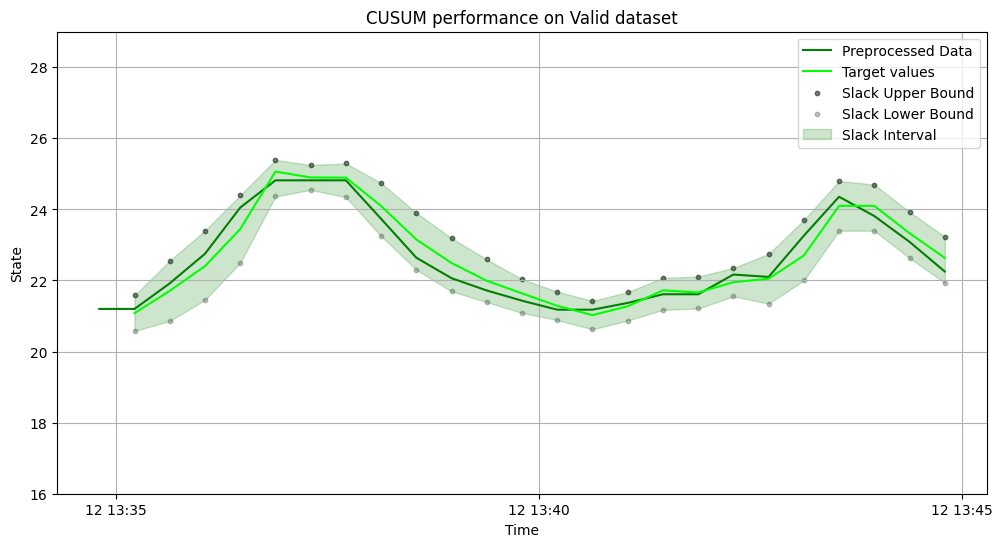

In [480]:
# Calculate the upper and lower bounds using the 'div' column
val_target_df['Upper'] = val_target_df['Target'] + val_target_df['div_high']
val_target_df['Lower'] = val_target_df['Target'] - val_target_df['div_low']

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the main 'State' line
plt.plot(cu_val_df['Time'], cu_val_df['State'], color='green', label='Preprocessed Data')
plt.plot(val_target_df['Time'], val_target_df['Target'], color='lime', label='Target values')

#################### XXX IMPORTANT XXX ###############################################
# Ek het die functions ingelos want dit maak dit maklikker om die Slack te teken
# Om die scatter plot punte weg te haal, ADD n '#' aan die voorkant van die line 

plt.scatter(val_target_df['Time'], val_target_df['Upper'], color='black', s=10, alpha=0.5, label='Slack Upper Bound')
plt.scatter(val_target_df['Time'], val_target_df['Lower'], color='grey', s=10, alpha=0.5, label='Slack Lower Bound')

########################################################################################

# Add the shaded area representing the confidence interval
plt.fill_between(val_target_df['Time'], val_target_df['Lower'], val_target_df['Upper'], color='green', alpha=0.2, label='Slack Interval')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('State')
plt.title('CUSUM performance on Valid dataset')
plt.legend()
plt.ylim(16, 29)
plt.grid(True)

# Show the plot
plt.show()

In [481]:
cu_err_df.head()

,State,Time,Device,Unit
0,20.7,2024-09-12 13:02:43,SSTEMP_sensor,C
1,22.0,2024-09-12 13:03:08,SSTEMP_sensor,C
2,25.0,2024-09-12 13:03:33,SSTEMP_sensor,C
3,25.0,2024-09-12 13:03:58,SSTEMP_sensor,C
4,23.0,2024-09-12 13:04:23,SSTEMP_sensor,C


In [482]:
cu_err_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   State   31 non-null     float64       
 1   Time    31 non-null     datetime64[ns]
 2   Device  31 non-null     object        
 3   Unit    31 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.1+ KB


In [483]:
err_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Target  21 non-null     float64       
 1   Time    21 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 468.0 bytes


In [484]:
cu_err_df = cu_err_df[8:30]

In [485]:
cu_err_df.loc[13, 'State'] = 30.5
cu_err_df.loc[21, 'State'] = 27
cu_err_df.loc[22, 'State'] = 27
cu_err_df.loc[23, 'State'] = 27 

### Tune Values here:

In [486]:
err_target_df['div_high'] = [0.5, 0.85, 1, 0.95, 0.33, 0.35, 0.4, 0.65, 0.75, 0.7, 0.6, 0.4, 0.4, 0.4, 0.4, 0.35, 0.45,
                   0.4, 0.7, 1, 0.7]

err_target_df['div_low'] = [0.5, 0.85, 0.95, 0.95, 0.7, 0.35, 0.55, 0.85, 0.85, 0.8, 0.6, 0.55, 0.4, 0.4, 0.4, 0.55, 0.45,
                   0.4, 0.7, 0.7, 0.7]

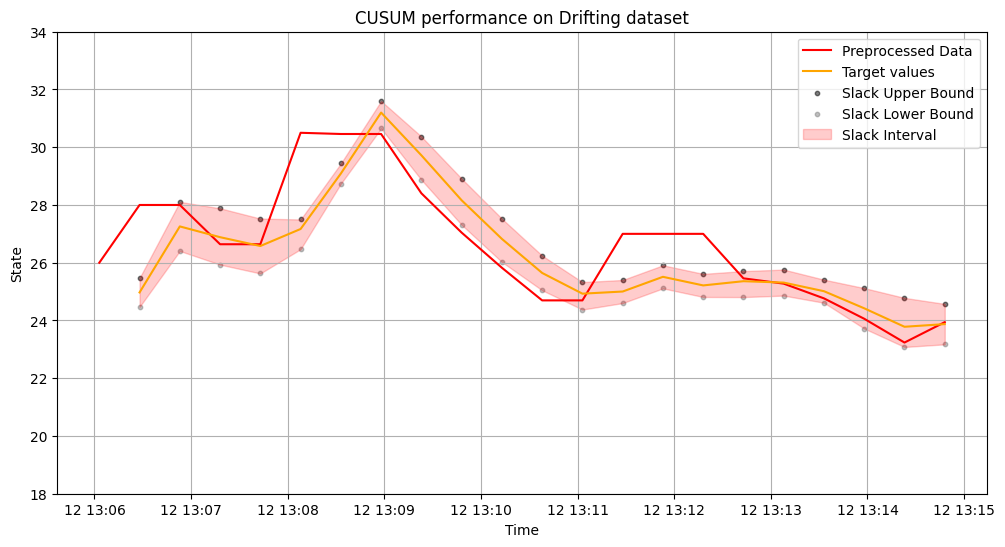

In [487]:
# Calculate the upper and lower bounds using the 'div' column
err_target_df['Upper'] = err_target_df['Target'] + err_target_df['div_high']
err_target_df['Lower'] = err_target_df['Target'] - err_target_df['div_low']

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the main 'State' line
plt.plot(cu_err_df['Time'], cu_err_df['State'], color='red', label='Preprocessed Data')
plt.plot(err_target_df['Time'], err_target_df['Target'], color='orange', label='Target values')


#################### XXX IMPORTANT XXX ###############################################
# Ek het die functions ingelos want dit maak dit maklikker om die Slack te teken
# Om die scatter plot punte weg te haal, ADD n '#' aan die voorkant van die line 

plt.scatter(err_target_df['Time'], err_target_df['Upper'], color='black', s=10, alpha=0.5, label='Slack Upper Bound')
plt.scatter(err_target_df['Time'], err_target_df['Lower'], color='grey', s=10, alpha=0.5, label='Slack Lower Bound')

########################################################################################

# Add the shaded area representing the confidence interval
plt.fill_between(err_target_df['Time'], err_target_df['Lower'], err_target_df['Upper'], color='red', alpha=0.2, label='Slack Interval')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('State')
plt.title('CUSUM performance on Drifting dataset')
plt.legend()
plt.ylim(18, 34)
plt.grid(True)

# Show the plot
plt.show()